# EDA
I've split the EDA into 3 separate parts:
- Understanding features
- Cleaning the dataset
- Relationship analysis

In [294]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
# Load dataset
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\titanic.csv')

In [296]:
df.shape

(891, 12)

The dataset has 891 rows and 12 columns

In [297]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Name of each column. Gives us an overview of what kind of values to expect

In [298]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Indicates which datatype each column has
- int64: normal numeric value
- object: a categorical value

In [300]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


.describe() gives us information about how many values each column contains, the mean, standard deviation, and different percentiles. .describe() can only handle numeric values.
Here we can also see that the Age column are missing multiple values.
I cannot see any strange values.

In [301]:
df[['Pclass', 'Embarked', 'Sex', 'Survived']].nunique()

Pclass      3
Embarked    3
Sex         2
Survived    2
dtype: int64

Indicates how many different values in the categorical features

# Cleaning the dataset

## Feature Selection

In [302]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

- Removing PassengerId due to it holding no meaningful data for visualizing or ML
- Removing name for the same reason
- Ticket consists of the ticket number which probably have no correlation with survival
- Cabin has way to many null-values to give us any meaningful info and therefor I removed it

## Null-values

In [303]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [304]:
# To find which place most people embarked from to set this as the embarked for Null values
max = df.groupby('Embarked').count()
# print(max)

# Sets null values equal to the median of that column
def handle_null_median(df):
    # Need to set inplace=True, so it doesn't create a copy of the dataframe. Tried without and this led to null-values not being removed
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)

    df['Embarked'].fillna('S', inplace=True)

    return  df

# Sets null values equal to the mean of that column
def handle_null_mean(df):
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Age'].fillna(df['Age'].mean(), inplace=True)

    df['Embarked'].fillna('S', inplace=True)

    return  df

# Function to drop all rows with at least 1 null value. (Removes way to many rows, so isn't a good option)
def null_values_drop(df):
    df_copy = df.copy()
    df_drop = df_copy.dropna(axis=0, how='any')

    return df_drop

df = handle_null_median(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [305]:
# Check the new sum of nulls
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Encoding

In [306]:
df['Sex'] = df['Sex'].replace(['female', 'male'], [0,1])
df['Embarked'] = df['Embarked'].replace(['S', 'Q', 'C'], [0,1,2])
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,0
8,1,3,0,27.0,0,2,11.1333,0
9,1,2,0,14.0,1,0,30.0708,2


## Feature Engineering

In [307]:
# Got the idea of splitting age into bins from: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier, but seems like a common practice called Binning, where you put a range of values into a bin
def bins(df): # This is kind of feature engineering as well
    df['AgeGroup'] = 0
    df.loc[df['Age'] < 16.336, 'AgeGroup' ] = 0
    df.loc[(df['Age'] >= 16.336) & (df['Age'] < 32.252), 'AgeGroup'] = 1
    df.loc[(df['Age'] >= 32.252) & (df['Age'] < 48.168), 'AgeGroup'] = 2
    df.loc[(df['Age'] >= 48.168) & (df['Age'] < 64.084), 'AgeGroup'] = 3
    df.loc[df['Age'] >= 64.084, 'AgeGroup'] = 4

    # Could also make a FareGroup column, but don't think I'll gain any useful information I don't already have in Pclass

    return df

df = bins(df)

I've made these bins to make it easier to find correlation between age and other independent variables

In [308]:
# Got this idea from a Titanic notebook: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier
df['FamilyMembersCount'] = df['Parch'] + df['SibSp'] + 1
df[['Parch', 'SibSp', 'FamilyMembersCount']].head()

,Parch,SibSp,FamilyMembersCount
0,0,1,2
1,0,1,2
2,0,0,1
3,0,1,2
4,0,0,1


In [309]:
# Drop columns no longer used after feature engineering
df = df.drop(['Parch', 'SibSp'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup,FamilyMembersCount
0,0,3,1,22.0,7.2500,0,1,2
1,1,1,0,38.0,71.2833,2,2,2
2,1,3,0,26.0,7.9250,0,1,1
3,1,1,0,35.0,53.1000,0,2,2
4,0,3,1,35.0,8.0500,0,2,1


# Relationship analysis

### Univariate Analysis

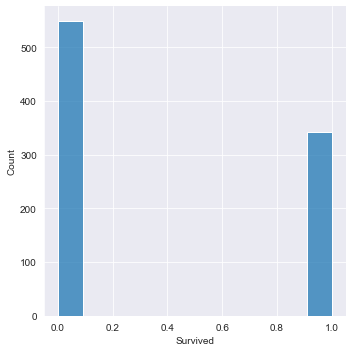

In [310]:
sns.displot(df['Survived'])

More people died than survived. We know this comes from a lack of safety measures, lifeboats and cold water

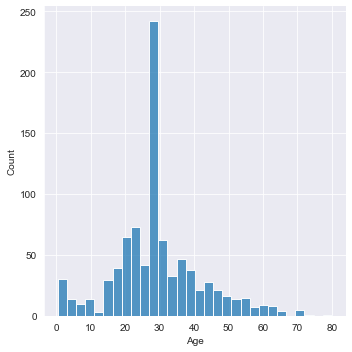

In [311]:
sns.displot(df['Age'])

Somewhat evenly distributed.
A massive spike in people being in their late 20's

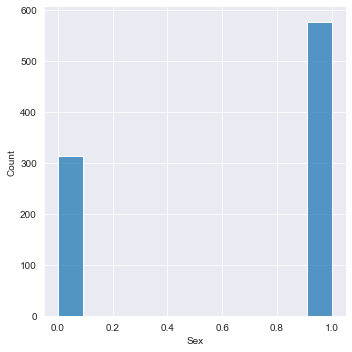

In [312]:
sns.displot(df['Sex'])

More males than females.

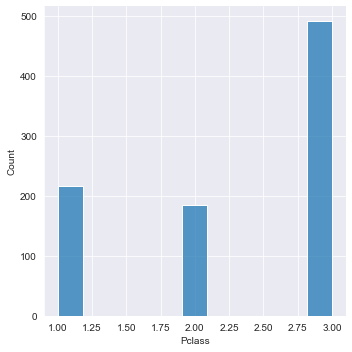

In [313]:
sns.displot(df['Pclass'])

I expected it to be a linear trend down from Pclass 3 to Pclass 1, but here we can see that more people traveled in first class then second class, and as expected most in third.

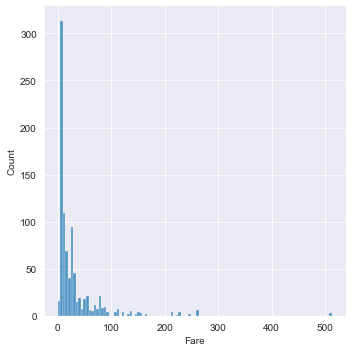

In [314]:
sns.displot(df['Fare'])

Looks to me like a F-distribution

### Multivariate Analysis

<AxesSubplot:>

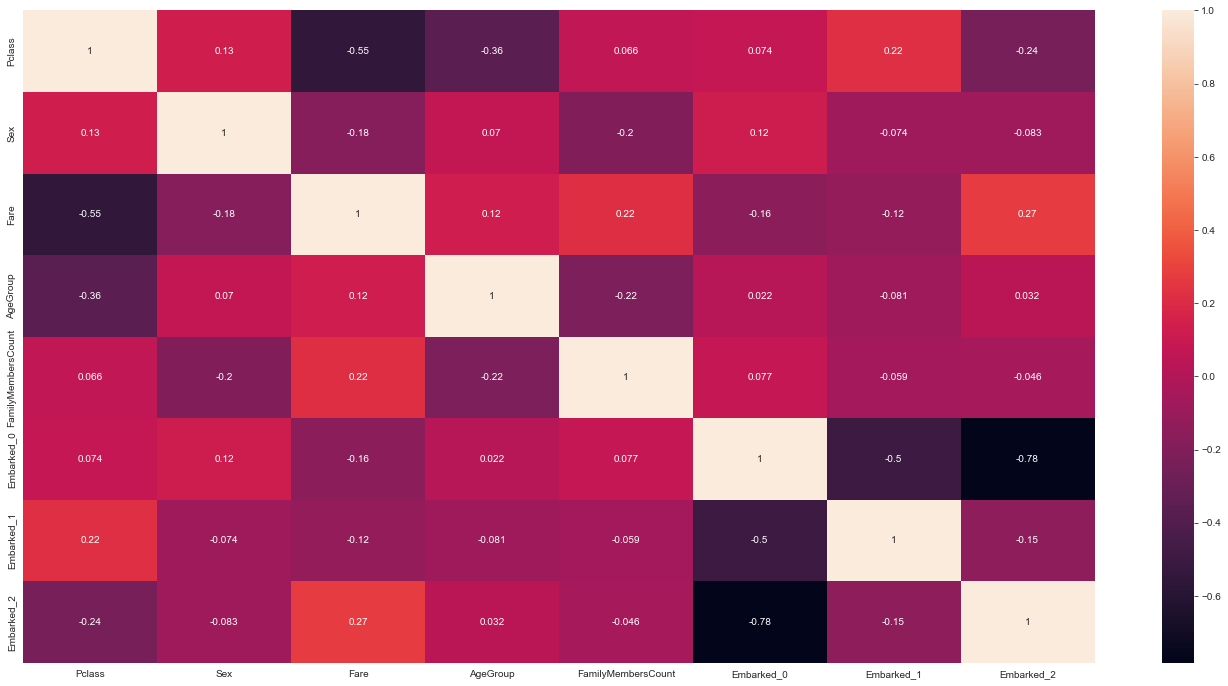

In [315]:
df_temp = df.drop(['Survived', 'Age'], axis=1)

df_temp['Embarked'] = df_temp['Embarked'].astype('category')

df_temp = pd.get_dummies(df_temp)
corr = df_temp.corr()
plt.figure(figsize=(24,12))
sns.heatmap(corr, annot=True)

The correlation matrix indicates the correlation between each feature, excluding the ground truth.
From this matrix we can see:
- Good correlation between Pclass and: Fare, AgeGroup and Embarked_1
    - Negative correlation with Fare: The lower the pclass, the higher the fare price
    - Negative correlation with AgeGroup: The lower the pclass, the higher the age group
    - Positive correlation with Embarked_1: People traveling from this location paid more than those who traveled from the other locations
- Correlation between Sex and: Embarked_0 (more males), Fare and Pclass
    - Positive correlation with Embarked_0: More males traveled from here (should result in higher percent of death)
    - Negative correlation with Fare: Indicates that females paid generally more than males for their tickets
    - Positive correlation with Pclass: Indicates the same as the point before
- Fare almost identical to Pclass
- Correlation between AgeGroup and Fare
    - Positive correlation with Fare: Higher age groups paid more for their tickets, which again leads to higher Pclass
- Correlation between FamilyMembersCount: AgeGroup, Fare and Sex
    - Positive correlation with Fare: The bigger the family the more they paid for each ticket
    - Negative correlation with AgeGroup: Bigger families = lower age group. Probably due to kids dragging the age down
    - Negative correlation with Sex: Indicates more males traveled in smaller family sizes

(I could check out each feature correlation from the list above, but this would simply take to long and make the notebook hard to read. I therefor chose a selection of these features to go further with)

In [316]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


The biggest indicator if you were going to survive the Titanic was your gender. From this statistic we can conclude:
- Men were less prioritized and only 19% of all men onboard survived, while 74% of all females survived

In [317]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Here we can see a clear correlation between survival and Ticket class. The higher your class the more likely you were of surviving. This correlation can come from a wide range of different reasons. The two reasons I find the most likely is:
- Higher classes were situated closer to the main deck and therefore had easier access to the few lifeboats. On the contrary, the lower class(Pclass 3) was most often situated at the lower decks and therefore had a greater chance of dying from the initial flooding of the boat
- Higher classes were also most likely prioritized when it came to which was getting a lifeboat

In [321]:
df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Survived
0,0,0.550000
1,1,0.344168
2,2,0.404255
3,3,0.434783
4,4,0.090909


From this table we can see:
- Kids had the highest chance of survival, probably due to them being prioritised
- AgeGroup 2 and 3 had suddenly a rise in survival rate. Probably due to them on average being higher class
- Only 10% of people in age group 4 survived. Probably due to few people being in this category and them being less prioritised

In [322]:
df[['AgeGroup', 'Pclass']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Pclass
0,0,2.610000
1,1,2.478011
2,2,2.005319
3,3,1.507246
4,4,1.727273


Confirms what I said about Age group 2 and 3 having higher average ticket class

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

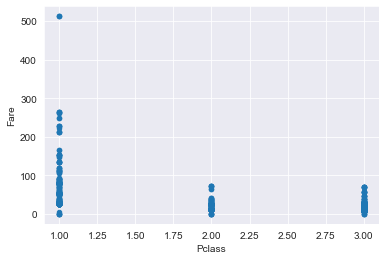

In [318]:
df.plot(kind='scatter', x='Pclass', y='Fare')

Distribution of fare price per ticket class.
From this plot we can see:
- Pclass 1 paid a way higher price than the rest
- Looks like Pclass 2 and Pclass 3 has almost the same distribution of fare price.

I will take a closer look at this to see if there is a difference between Pclass 2 and 3

In [319]:
df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


Average Fare price for each Pclass
From this plot we can see:
- Pclass 1 paid on average 4x what Pclass 2 did
- Here we can see a clear difference between Pclass 2 and 3
- Pclass 2 and Pclass 3 are closer to each other than Pclass 1 and Pclass 2.
    - This will most likely lead to Pclass 2 and Pclass 3 having all together closer data
- Pclass and Fare is highly correlated and I can therefor most likely remove of the variables without any loss in data